In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.viewer.mpl import drawStreams

(<AxesSubplot:>, None)

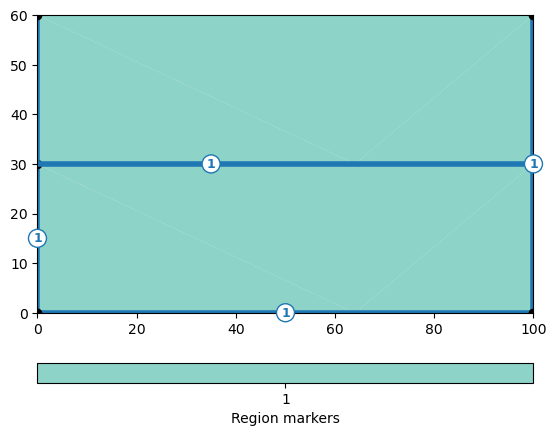

In [19]:
x_coord = np.linspace(0, 100, 100)
y_coord = np.linspace(0, 30, 30)
y_coord2 = np.linspace(30, 60, 30)

rect1 = mt.createRectangle([0,30], [100,0])
rect2 = mt.createRectangle([0,60], [100,30])

rect = rect1 + rect2
mesh = mt.createGrid(x_coord, y_coord, worldBoundaryMarker=True, marker=2)
pg.show(rect, markers=True, showMesh=True, showBoundaries=True)


# pg.show(mesh, markers=True)

In [6]:
kMap = {1: 1.0, 2: 1.0, 3: 1.0}
kArray = pg.solver.parseMapToCellArray(list(kMap), mesh)
kArray2 = np.column_stack([kArray] * 3)

h = pg.solver.solveFiniteElements(mesh, kMap, bc={'Dirichlet': {1: 1.0, 2: 1.0, 3: 1.0, 5: 0.0, 6: 0.0, 7: 0.0}}, verbose=True)
v = -pg.solver.grad(mesh, h) * kArray2

TypeError: can only concatenate list (not "int") to list

In [ ]:

ax, _ = pg.show(mesh, data=h, label='Temperature $T$',
                cMap="hot_r", nCols=8, contourLines=True)

drawStreams(ax, mesh, v, color='green', quiver=True)

pg.wait()
# ax, _ = pg.show(mesh, data=v, label='Velocity $v$')
